<a href="https://colab.research.google.com/github/Shaif95/AICamp_DS/blob/main/Stock_Viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib as mpl
import pandas as pd
import yfinance as yf


def get_stock_data(ticker, start_date, end_date):
    stock = yf.download(ticker, start=start_date, end=end_date)
    stock.reset_index(inplace=True)  # Reset index to get separate "Date" column
    return stock

# Example usage:
start_date = '2023-01-01'
end_date = '2023-07-01'
ticker = 'AAPL'
stock_data = get_stock_data(ticker, start_date, end_date)
stock_data

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,130.279999,130.899994,124.169998,125.070000,124.706833,112117500
1,2023-01-04,126.889999,128.660004,125.080002,126.360001,125.993095,89113600
2,2023-01-05,127.129997,127.769997,124.760002,125.019997,124.656982,80962700
3,2023-01-06,126.010002,130.289993,124.889999,129.619995,129.243622,87754700
4,2023-01-09,130.470001,133.410004,129.889999,130.149994,129.772079,70790800
...,...,...,...,...,...,...,...
119,2023-06-26,186.830002,188.050003,185.229996,185.270004,185.270004,48088700
120,2023-06-27,185.889999,188.389999,185.669998,188.059998,188.059998,50730800
121,2023-06-28,187.929993,189.899994,187.600006,189.250000,189.250000,51216800
122,2023-06-29,189.080002,190.070007,188.940002,189.589996,189.589996,46347300


In [ ]:
import plotly.graph_objects as go

from datetime import datetime
df = stock_data
fig = go.Figure(data=[go.Candlestick(x=df['Date'].head(75),
                open=df['Open'].head(75),
                high=df['High'].head(75),
                low=df['Low'].head(75),
                close=df['Close'].head(75))])

fig.show()

In [ ]:
def get_candle_chart(df):
  fig = go.Figure(data=[go.Candlestick(x=df['Date'].head(75),
                open=df['Open'].head(75),
                high=df['High'].head(75),
                low=df['Low'].head(75),
                close=df['Close'].head(75))])
  fig.show()

start_date = '2023-01-01'
end_date = '2023-07-01'
ticker = 'AMZN'
stock_data = get_stock_data(ticker, start_date, end_date)
get_candle_chart(stock_data)

[*********************100%***********************]  1 of 1 completed


In [ ]:
import plotly.express as px

def get_line_plot(df):
  fig = px.line(df, x = 'Date', y = 'Open', title = 'Open Price')
  fig.show()

get_line_plot(stock_data)

In [ ]:
import plotly.express as px

def get_bar_chart(df):
  fig = px.bar(df, x = 'Date', y = 'Volume', title = 'Volume Traded')
  fig.show()

get_bar_chart(stock_data)

In [ ]:
import matplotlib.pyplot as plt
# WIP, working on getting the value counts shown in the label
def get_pie_chart(data):
  data['Change'] = data['Open'] - data['Close'].shift(1)
  data['Movement'] = data['Change'].apply(lambda x : 'Up' if x > 0 else 'Down')
  plt.pie(data['Movement'].value_counts(), labels=data['Movement'].unique())
  plt.show()

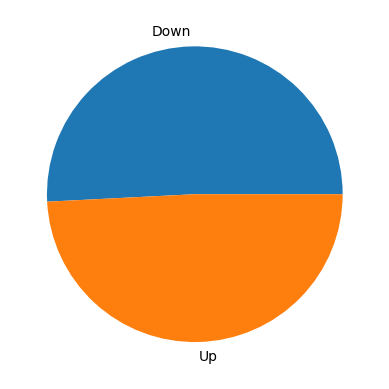

In [ ]:
get_pie_chart(stock_data)